# Laboratorio 4.2: Integral estocástica y EDEs

Integrantes: Leopoldo Cárdenas, Valentina Gómez, Francisco Muñoz, Jorge Sossa, Miguel Videla


In [ ]:
from time import time
import numpy as np
from numpy import random
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math

## Problema 1: Movimiento Browniano

### Parte 1

Programe una función `BrownianTrajectories` que reciba como parámetros:
* Un vector $x$ de $N$ condiciones iniciales,
* un tiempo final $T>0$,
* un entero $K>0$,

y que simule $N$ copias independientes de un movimiento browniano $(B_t)_{t\in[0, T]}$ en la grilla $t = (t_0, t_1, \ldots , t_K)$,
con $t_i = iT/K$, partiendo de las condiciones iniciales indicadas en el vector $x$. Debe retornar `[t, B]`, siendo
`B` la matriz con todas las trayectorias simuladas.

In [ ]:
def brownian_trajectories(x, T, K, seed=None):
    """
    'x' es un vector de N cond. iniciales, 'T' es el tiempo final y 'K' es
    un entero
    """
    assert isinstance(x, np.ndarray), "'x' debe ser un arreglo"
    assert T > 0, "'T' debe ser positivo"
    assert type(K) is int, "'K' debe ser un entero"
    assert K > 0 and type(K) is int, "'K' debe ser un entero positivo"
    # Seteamos la seed
    np.random.seed(seed)

    N = x.size
    
    # discretización del tiempo
    dt = T / K
    t = np.linspace(0, T, K+1)

    # Realización de Z
    Z_ = np.random.normal(size=(N, K))
    Z = np.concatenate((x.reshape(-1, 1), Z_), axis=1)

    # Armar B
    B = np.sqrt(dt) * np.cumsum(Z, axis=1)

    return t, B

### Parte 2

Utilizando la función creada, genere y grafique $N = 50$ trayectorias brownianas partiendo de $x = 0$ hasta
$T$ muy grande ($T \geq 10^{10}$, por ejemplo), en una malla temporal suficientemente fina. Agregue los gráficos
de las funciones $L$ y $-L$, donde $L(t) := \sqrt{
2t \log \log t}$. Observe y comente.

In [ ]:
def plot_brownian_trajectories(t, B, fig=None, ax=None, 
                               figsize=(15, 7), c=None,
                               **kwargs):
    """
    Extiende a la función plot.
    Plotea realizaciones de movimiento Browniano.
    """
    # Definir tamaño de la figura
    if fig is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)

    if type(c) is str:
        c = [c]*len(B)

    label = kwargs.pop("label", None)

    # Printear las trayectorias
    for i, tray in enumerate(B):
        ax.plot(t, tray, c=c[i], label=label, **kwargs)
        label = None

    ax.set_title("Realización de Trayectorias Brownianas")
    ax.set_ylabel("$B_t$")
    ax.set_xlabel("$t$")

    ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Guardamos el resultado
    return fig, ax

def plot_L(t, fig=None, ax=None, eps=1e-8, **kwargs):
    label = kwargs.pop("label", None)
    
    if fig is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)

    t_ = np.where(t >= np.e, t, np.ones_like(t)*np.e)

    L = np.sqrt(2*t_ * np.log(np.log(t_+eps)))

    ax.plot(t_, L, label=label, **kwargs)
    ax.plot(t_, -L, **kwargs)

    return fig, ax


In [ ]:
# Seteamos constantes
N, T, K = 50, 1e10, 100000

# Realización de trayectorias brownianas
x = np.zeros(N)
t, B = brownian_trajectories(x, T, K, seed=43)

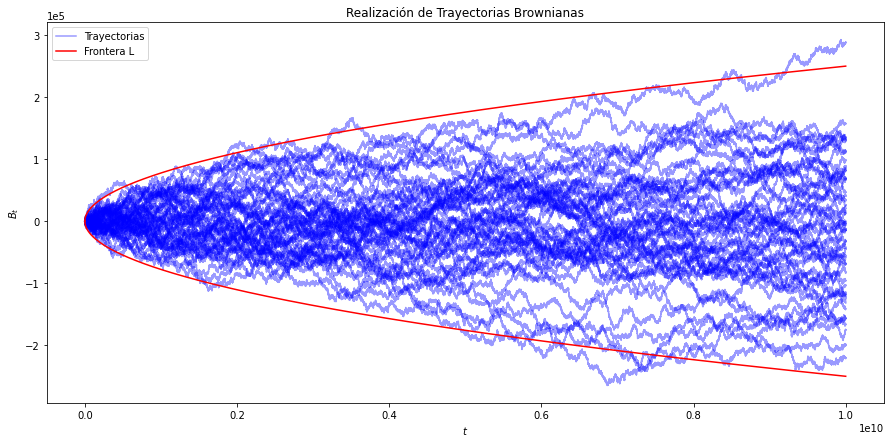

In [ ]:
# Definimos condiciones iniciales y ploteamos
fig, ax = plot_brownian_trajectories(t, B, c="b", alpha=0.4, label="Trayectorias")
plot_L(t, fig=fig, ax=ax, c="r", label="Frontera L", eps=0)

plt.legend()

plt.show()

del t, B, x

Se comprueba que c.s.

$$
\limsup_{t \to \infty} \frac{B_t}{\sqrt{2t log log(t)}} = 1
$$

$$
\liminf_{t \to \infty} \frac{B_t}{\sqrt{2t log log(t)}} = -1
$$

Por lo tanto, lo que se espera ver en el grafico anterior, es que las trayectorias se mantengan dentro de la frontera la mayoría del tiempo, pero que también la estén constantemente interceptando e incluso pueden llegar a sobrepasarla por instantes, ya que la relación anterior es c.s. 

Que es justamente lo que se logra apreciar en el gráfico. 


### Parte 3

Fije $T \in [1, 10]$ a gusto. Definimos el _valor absoluto_ |B| y el _máximo acumulado_ $M$ del browniano, como
\begin{equation*}
|B|_t := |B_t| \quad \mbox{y} \quad S_t := \max_{s \leq t} B_t
\end{equation*}

#### a)

Para $N = 3$ brownianos simulados, grafique las trayectorias de $|B|$ y $S$ asociadas, comentando en
qué se diferencian.

In [ ]:
# Simular
np.random.seed(42)
T, K = 10, 80000
# T, K = 10, 10
x = np.zeros(3)
t, B = brownian_trajectories(x, T, K)
abs_B = np.abs(B)
S = np.maximum.accumulate(B, axis=1)

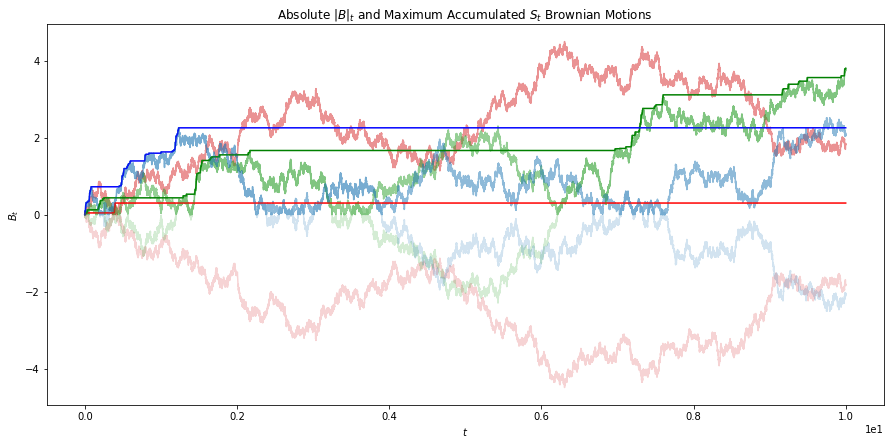

In [ ]:
fig, ax = plot_brownian_trajectories(t, abs_B, label="$|B|_t$", 
                                     alpha=0.5, c=["tab:red", "tab:green", "tab:blue"])
plot_brownian_trajectories(t, S, fig=fig, ax=ax, label="$S_t$", 
                                  c=["r", "g", "b"])
plot_brownian_trajectories(t, B, fig=fig, ax=ax, label="$B_t$", 
                                  alpha=0.2, c=["tab:red", "tab:green", "tab:blue"])

# plt.legend()
ax.set_title("Absolute $|B|_t$ and Maximum Accumulated $S_t$ Brownian Motions")

plt.show()

del t, B, x, abs_B, S

Como en el gráfico se puede observar, el máximo acumulado es una función escalonada creciente, mientras que el valor absoluto oscila. 

Aquello es natural al pensar que el máximo acumulado se define sobre todas las posiciones anteriores, y que el Browniano sin módulo también tiene ese comportamiento inestable. 

Además como el Browniano da pasos 'pequeños' (para la escala en que está el gráfico), el valor absoluto tiene cierta continuidad aunque pase por el cero (cuando el Browniano cambia de signo).

También es relevante mencionar que el máximo absoluto está mayorado por el valor absoluto. Pues es a lo más la parte positiva de la trayectoria, mientras que el valor absoluto también crece cuando la trayectoria va hacia los negativos. 

#### b)

Para $N$ grande ($N \geq 10^5$, por ejemplo), grafique histogramas de $|B|_T$ y $S_T$ . Observe, compare y
comente. Busque en Google o en un libro el resultado matemático correspondiente a lo que ilustran
estas simulaciones.

Como ya sabemos $B_\tau \sim \mathcal{N}(0, \tau)$, por lo tanto $|B|_\tau$ distribuye como la norma de una normal$(0, \tau)$ y como resultado del _principio de reflexión_ de un movimiento Browniano,$S_\tau$ tiene la misma distribución que $|B|_\tau$. 

Que es justamente lo que se logra apreciar en los histogramas siguientes: 

In [ ]:
x0 = np.zeros(10 ** 5)
T = 10
K = 5000
t, B = brownian_trajectories(x0, T, K)
abs_B = np.abs(B)
S = np.maximum.accumulate(B, axis=1)

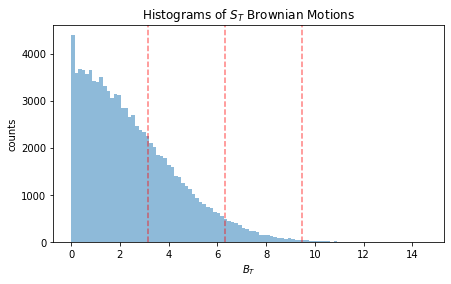

In [ ]:
plt.figure(figsize=(7,4))
#plt.hist(abs_B[:,-1], bins=100, alpha=0.5, label=r'$|B|_T$')
plt.hist(S[:,-1], bins=100, alpha=0.5, label=r'$S_T$')
plt.xlabel(r'$B_T$')
plt.ylabel('counts')
plt.axvline(x=np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.axvline(x=2*np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.axvline(x=3*np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.title('Histograms of $S_T$ Brownian Motions')
#plt.legend()
plt.show()

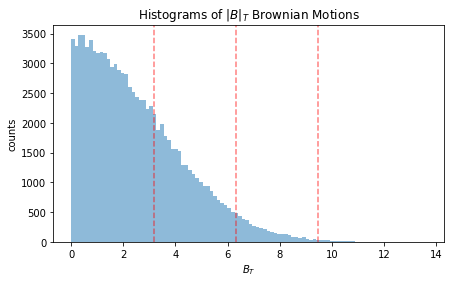

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(abs_B[:,-1], bins=100, alpha=0.5, label=r'$|B|_T$')
#plt.hist(S[:,-1], bins=100, alpha=0.5, label=r'$S_T$')
plt.axvline(x=np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.axvline(x=2*np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.axvline(x=3*np.sqrt(T), color= 'r', alpha= 0.5, linestyle= '--' )
plt.xlabel(r'$B_T$')
plt.ylabel('counts')
plt.title('Histograms of $|B|_T$ Brownian Motions')
#plt.legend()
plt.show()

In [ ]:
del t, B, x0, abs_B, S

## Problema 2: Resoluación numérica de ecuaciones diferenciales estocásticas

Consideremos una ecuación diferencial estocástica genérica:
\begin{equation*}
d X_t = b(X_t) dt + \sigma(X_t) dB_t, \quad X_0 = x_0, \tag{1}
\end{equation*}

donde $(B_t)_{t\geq0}$ es un movimiento browniano en $\mathbb{R}$, $x_0 \in \mathbb{R}$ está dado, y $b, \sigma : \mathbb{R} \to \mathbb{R}$ son funciones conocidas.
En esta parte del laboratorio deseamos resolver numéricamente esta ecuación, y evaluar el desempeño de los
algoritmos utilizados.

### Parte 1

Implemente una función `[t, B, E]=SDEEuler(N, K, T, x0, b, s)` que realice lo siguiente:
* Genere una malla `t` del intervalo $[0, T]$ usando paso $T/K$.
* Genere $N$ trayectorias brownianas independientes en dicha malla, retornando el resultado en `B`.
* Por cada trayectoria browniana, genere las aproximaciones de la solución de (1) mediante el esquema
de Euler, retornando el resultado en `E`. Las variables `x0`, `b` y `s` corresponden a $x_0$, $b$ y $\sigma$.

Utilice esta función para explorar la naturaleza de las soluciones en función de los coeficientes $b$ y $\sigma$: realice
pruebas y gráficos para $N = 1$ trayectoria y para variados $b$ y $\sigma$ que usted estime convenientes; por ejemplo,
puede fijar $b$ y considerar distintos $\sigma$ que son múltiplos de una función fija, para ver los efectos del ruido en
la ecuación. Deberá por tanto simular las trayectorias de los diferentes procesos usando la misma realización
de un movimiento Browniano.

Empezaremos definiendo la función `SDEEuler` que toma de parámetros los comentados anteriormente, adicionalmente se puede fijar una semilla `seed`, que es por defecto `None` (i.e. funciona aleatoriamente). Esta función realiza una aproximación de la Ec. (1) mediante un esquema de Euler retornando `[E, t, B]` (un poco diferente a como se dice en el enunciado, por conveniencia).

In [ ]:
def SDEEuler(N, K, T, x0, b, s, seed=None):
    '''Euler's method for EDE approximation'''
    R = np.random.RandomState(seed)
    h = T / K
    W = R.normal(size=(N, K))
    Xt = [x0]
    for i in range(K):
        Xt.append(Xt[-1] + b(Xt[-1]) * h + s(Xt[-1]) * np.sqrt(h) * W[:,i])
    return Xt[-1], np.linspace(0, T, K+1), np.array(Xt).T

Se tomarán las funciones más simples por comodidad. 

Se considerará para $\sigma$ las funciones $\sigma_i(x) = a_i x$ donde $a_i \in [0.01, 0.1, 0.5, 1, 2]$. De forma análoga, se considerará para $b$ funciones del estilo $b_i(x) = c_i x$ donde $c_i \in [0.01, 0.3, 0.7, 1, 1.3]$.

Además, se dejarán fijadas como "función genérica" las funciones $\sigma(x) = 2x$ y $b(x) = 0.1 x$.

In [ ]:
# $\sigma(x)$ functions
def s1(x): return x * 0.01
def s2(x): return x * 0.1
def s3(x): return x * 0.5
def s4(x): return x * 1
def s5(x): return x * 2
def sb(x): return x * 2

# $b(x)$ functions
def b1(x): return x * 0.01
def b2(x): return x * 0.3
def b3(x): return x * 0.7
def b4(x): return x * 1
def b5(x): return x * 1.3
def bs(x): return x * 0.1

Se definirán unas constantes que serán útiles.

In [ ]:
# Parameters
N, K, T = 1, 100000, 10
x0 = np.array([1.0])

# Functions
s_funs = [s1, s2, s3, s4, s5]
b_funs = [b1, b2, b3, b4, b5]
s_factors = [0.01, 0.1, 0.5, 1, 2]
b_factors = [0.01, 0.3, 0.7, 1, 1.3]

Y se realizarán las aproximaciónes utilizando estas funciones, dejando fijada la seed igual a 1, para que generen los mismos movimientos Brownianos.

In [ ]:
# Euler approximation
X_s = []
for s in s_funs:
    E, t, Xt = SDEEuler(N, K, T, x0, b=bs, s=s, seed=1)
    X_s.append(Xt.flatten())
X_b = []

for b in b_funs:
    E, t, Xt = SDEEuler(N, K, T, x0, b=b, s=sb, seed=1)  
    X_b.append(Xt.flatten())

Finalmente, se grafican los resultados.

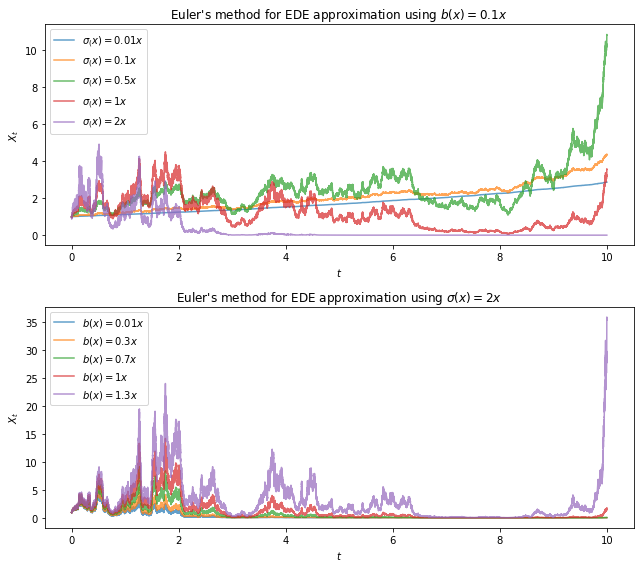

In [ ]:
# Plots
plt.figure(figsize=(9,8))
plt.subplot(2,1,1)
for i in range(len(X_s)):
    plt.plot(t, X_s[i], alpha=0.7, label=r'$\sigma_(x)={}x$'.format(s_factors[i]))
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')
plt.title(r"Euler's method for EDE approximation using $b(x)=0.1x$")
plt.legend()
plt.subplot(2,1,2)
for i in range(len(X_b)):
    plt.plot(t, X_b[i], alpha=0.7, label=r'$b(x)={}x$'.format(b_factors[i]))
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')
plt.title(r"Euler's method for EDE approximation using $\sigma(x)=2x$")
plt.legend()
plt.tight_layout()
plt.show()

Del primer gráfico, se observa que, cuando $\sigma$ tiene un bajo aporte (como en el caso de $\sigma(x) = 0.01x$) entonces la solución no tiene prácticamente nada de ruido. Y a medida que el factor de escala aumenta, se aprecia que el ruido se ve incrementado. Esto tiene sentido, pues $\sigma$ regula el aporte que tiene el movimiento Browniano, de forma que si $\sigma = 0$, entonces la Ec. (1) se transforma en una EDP común y corriente de la forma $dX_t / dt = c X_t$. Es más, en el primer gráfico, para $\sigma=0.01x$ se observa como solución una exponencial.

Para el segundo gráfico se observa que el papel que cumple $b$ es casi de "escalar" las soluciones. De forma que tomando $b(x) = 0.01x$ estabiliza las soluciones y las mantiene cercanas a 0, mientras que con $b(x) = 1.3 x$ "magnifica" el ruido que posee el movimiento Browniano resultando que al final el valor final resultó cercano a 35.

### Parte 2

En el caso particular en que $b(x) = bx$ y $\sigma(x) = \sigma x$ para ciertas constantes $b$, $\sigma$, la ecuación (1) describe
un <i>movimiento browniano geométrico</i>, y puede resolverse explícitamente:
\begin{equation*}
X_t = x_0 \exp \left( \Big( b - \frac{\sigma^2}{2}\Big)t + \sigma B_t \right) \tag{2}
\end{equation*}

Para parámetros $N$, $K$, $T$, $x_0$, $b$ y $\sigma$ que usted estime convenientes, obtenga la aproximación de Euler. Compare
gráficamente contra la trayectoria de la solución exacta dada por (2) utilizando el mismo movimiento
Browniano. Comente.

Se eEmpezará definiendo unas cuantas funciones auxiliares. La primera función `geometric_bm` es la solución explícita de la Ec. (2), mientras que las otras dos funciones es para representar las funciones $\sigma$ y $b$.

In [ ]:
# Auxiliary functions
def geometric_bm(N, K, T, x0, b, s, seed=None):
    '''Analytical geometric browinan motion'''
    Xt = []
    t, B = brownian_trajectories(np.zeros(N), T, K, seed)
    for i in range(B.shape[1]):
        Xt.append(x0 * np.exp((b - s ** 2 / 2) * t[i] + s * B[:,i]))
    return t, np.array(Xt).T
  
def b_geometric(x):
  return b * x

def s_geometric(x):
  return s * x

Con estas funciones, se realizarán distintas simulaciones para $K \in [10, 100, 1000]$ del movimiento Browniano, fijando `T=1`, `x0=2`, `b=1` y `s=2`.

In [ ]:
# Parameters
N = 1
T = 1
x0 = np.array([2.0])
b = 1
s = 2

# Exact brownian motion and euler's approximation
K_array = [10, 100, 1000, 10000]
X = []; E = []; t_array = []
for K in K_array:
  t, Xt = geometric_bm(N, K, T, x0, b, s, seed=1)
  X.append(Xt)
  _, t, Et = SDEEuler(N, K, T, x0, b_geometric, s_geometric, seed=1)
  E.append(Et)
  t_array.append(t)

Finalmente, se grafican los resultados.

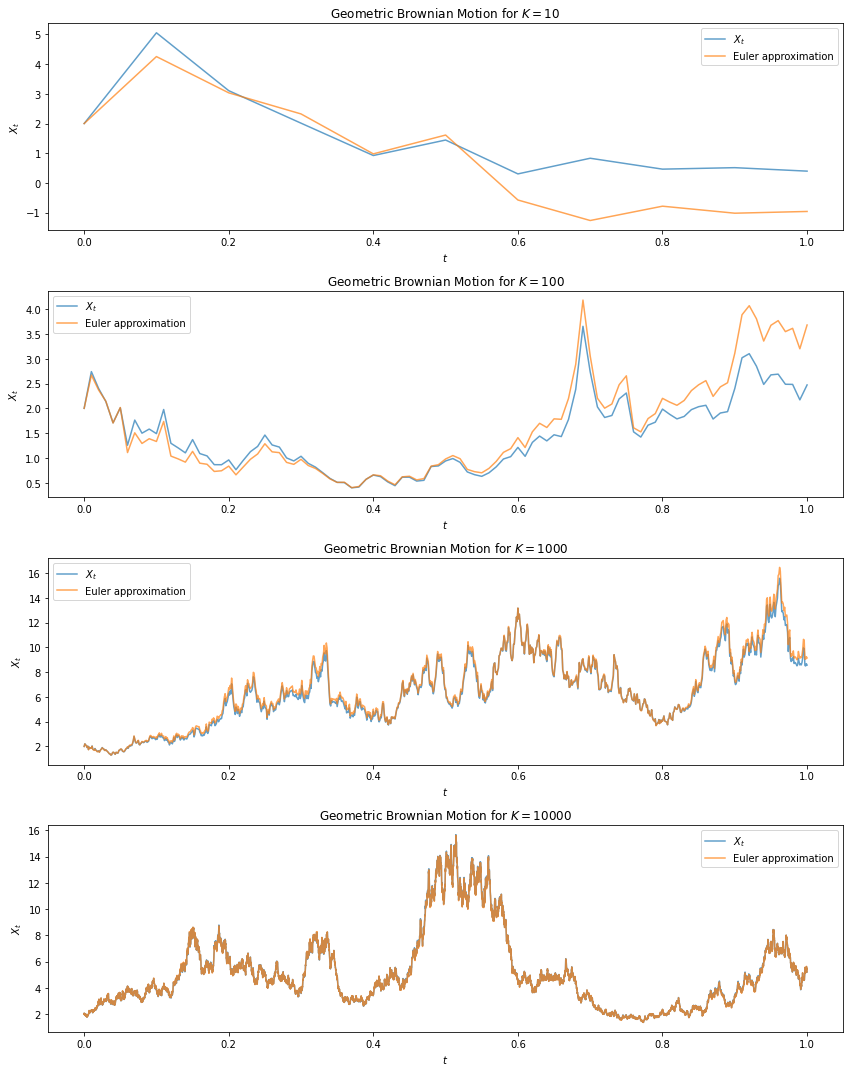

In [ ]:
# Plot
plt.figure(figsize=(12,15))
for i in range(len(K_array)):
  plt.subplot(len(K_array), 1, i+1)
  plt.plot(t_array[i], X[i].flatten(), alpha=0.7, label=r'$X_t$')
  plt.plot(t_array[i], E[i].flatten(), alpha=0.7, label='Euler approximation')
  plt.xlabel(r'$t$')
  plt.ylabel(r'$X_t$')
  plt.title('Geometric Brownian Motion for $K={}$'.format(K_array[i]))
  plt.legend()
plt.tight_layout()
plt.show()

De los gráficos anteriores se puede observar que a medida que paso de tiempo ($\Delta t = t_{i+1} - t_{i}$) se hace más pequeño (debido a que $K$ aumenta), la aproximación de Euler se va ajustando cada vez más a la solución teórica, de forma que resulta ser más fiable su aproximación.

### Parte 3

Siguiendo con el caso del movimiento browniano geométrico, en esta parte se desea cuantificar lo observado
gráficamente en el punto anterior. Específicamente: si $E^K_
t$ denota la aproximacion de Euler de paso $T/K$
al tiempo $t$, queremos estudiar
\begin{equation*}
\mathbb{E} |X_T - E^K_T| \tag{3}
\end{equation*}

y en particular ver a qué tasa converge a $0$ en función de $K$. Se espera que lo anterior sea de orden $K^{-\alpha}$, para
cierto $\alpha > 0$ por determinar experimentalmente. Para esto, fije $T = x_0 = b = \sigma = 1$ y un $N$ a conveniencia
($100$ ó $1000$ debería bastar), e implemente una función `TestSDEEuler()` que realice lo siguiente:

* Genere un vector creciente de distintos valores de $K$, desde $K$ relativamente pequeño ($\sim 10$ ó $\sim 100$)
a un a $K$ grande ($\sim 10^5$ o más). De preferencia, que sea un vector equiespaciado en escala logarítmica.
* Para cada $K$ generado, obtenga $N$ realizaciones de la aproximacion del esquema de Euler de (1). Utilice
estas realizaciones para aproximar la esperanza (3) usando Monte Carlo, donde para cada trayectoria,
$X_T$ se calcula de manera exacta usando la expresión (2) con la misma realización de $B_T$ que la del
movimiento Browniano discretrizado utilizado en el esquema de Euler. Grafique en función de $K$.
* Mediante una regresión lineal entre $\log(K)$ y el logaritmo de las aproximaciones de (3) obtenidas en
el punto anterior, obtenga una estimación de las tasa $\alpha$ del esquema y grafique los resultados de la
regresión.

Comente los resultados obtenidos.

Se realizará la función pedida:

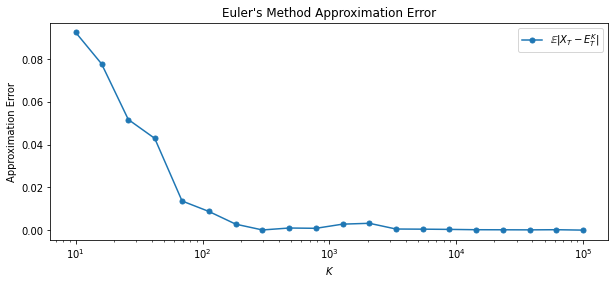

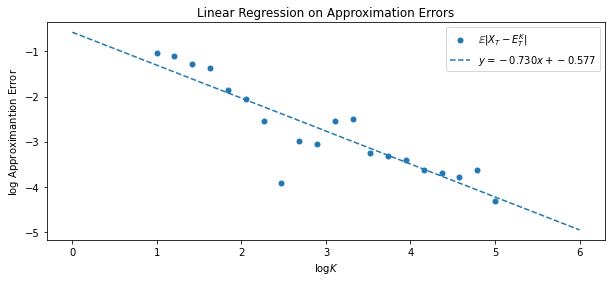

alpha = 0.7297489773831533


In [ ]:
b = s = 1

def TestSDEEuler():
  '''Performance test of Euler approximation'''
  # Parameters
  N = 1000
  T = b = s = 1
  x0 = np.full(N, 1.0)
  X_T = []
  E_T = []
  K_array = np.logspace(1, 5, num=20, dtype=int)

  # Exact brownian motion and euler's approximation
  for K in K_array:
    K = int(K)
    _, X = geometric_bm(N, K, T, x0, b, s, seed=1)
    X_T.append(np.mean(X[:,-1]))
    E, _, _ = SDEEuler(N, K, T, x0, b_geometric, s_geometric, seed=1)
    E_T.append(np.mean(E))
  X_T = np.array(X_T)
  E_T = np.array(E_T)

  # Expectation of the approximation error
  strong_errors = np.abs(X_T - E_T)

  # Plot
  plt.figure(figsize=(10,4))
  plt.plot(K_array, strong_errors, '.-', ms=10, label=r'$\mathbb{E}|X_T-E_T^K|$')
  plt.xscale('log') 
  plt.xlabel(r'$K$')
  plt.ylabel('Approximation Error')
  plt.title("Euler's Method Approximation Error")
  plt.legend()
  plt.show()

  # Linear regression in log-log space
  points = np.vstack((np.log10(K_array), np.log10(strong_errors))).T
  m, b, _, _, _ = stats.linregress(points)

  # Plot
  plt.figure(figsize=(10,4))
  plt.plot(points[:,0], points[:,1], '.', color='tab:blue', ms=10, label=r'$\mathbb{E}|X_T-E_T^K|$')
  plt.plot([0, 6], [m * 0 + b, m * 6 + b], '--', color='tab:blue', label=r'$y={:.3f}x+{:.3f}$'.format(m,b))
  plt.xlabel(r'$\log{K}$')
  plt.ylabel(r'$\log$ Approximantion Error')
  plt.title("Linear Regression on Approximation Errors")
  plt.legend()
  plt.show()

  # Approximation error estimated power term
  print('alpha = {}'.format(-m))

TestSDEEuler()

Observamos del primer gráfico que efectivamente $\mathbb{E} |X_T - E^K_T|$ va disminuyendo a medida que $K$ aumenta, corroborando lo comentado en la parte anterior, que a medida que $K$ aumentaba, la aproximación de Euler tiene un menor "gap" en comparación al valor teórico.

Por otro lado, del segundo gráfico se observa que sí existe tal relación entre $\mathbb{E} |X_T - E^K_T|$ y $K^{-\alpha}$. De aquí, si es que $\mathbb{E} |X_T - E^K_T| \in \mathcal{O}(K^{-\alpha})$, entonces $\log \mathbb{E} |X_T - E^K_T| \in \mathcal{O}(-\alpha \log K)$. De esta forma, realizando una regresión lineal a los puntos $(\log K, \log \mathbb{E} |X_T - E^K_T|)$ se podrá estimar $\alpha$, pues la pendiente de la regresión cumplirá que es aproximadamente a $-\alpha$. Esto se puede observar gráficamente en la segunda figura, resultando que $\alpha$ es aproximadamente $0.73$.

### Parte 4

Muestre que $\mathbb{E}(X_T) = e^{bT}$. Usando un esquema de Euler y Monte Carlo, calcule ahora $\mathbb{E}(E^K_T)$ y haga un
analisis similar al anterior para el denominado “error débill”: $|\mathbb{E}(X_T ) - \mathbb{E}(E^K_T )|$ (en contraste con el error
“fuerte” (3)). Comente.

Demostración de que $\mathbb{E}(X_t) = e^{bT}$: 

Tenemos que
\begin{align*}
\mathbb{E}(X_T)
&= \mathbb{E} \left[x_0 \exp \left( \Big( b - \frac{\sigma^2}{2}\Big)T + \sigma B_T \right)\right] \\
&= x_0 \exp(bT) \cdot
e^{-\frac{\sigma^2 T}{2}} \mathbb{E} \left[ \exp \left(  \sigma B_T \right)\right]
\end{align*}
Por otro lado, dado que $B_T \sim \mathcal{N}(0, T)$ observamos que
\begin{align*}
\mathbb{E} \left[ \exp \left(  \sigma B_T \right)\right]
&= \int  \exp(\sigma x) \frac{1}{\sqrt{2\pi T}}  \exp\left(-\frac{1}{2} \frac{x^2}{T}\right) dx\\
&= \int  \frac{1}{\sqrt{2\pi T}} \exp\left(-\frac{1}{2T} \{ x^2 - 2 \sigma T x + (\sigma T)^2 \} + \frac{\sigma^2 T}{2}\right) dx\\
&= e^{\frac{\sigma^2 T}{2}} \int  \frac{1}{\sqrt{2\pi T}} \exp\left(-\frac{1}{2T} \{ x - \sigma T \}^2 \right) dx\\

&= e^{\frac{\sigma^2 T}{2}}
\end{align*}
Reemplazando este resultado en la expresión anterior obtenemos que
\begin{align*}
\mathbb{E}(X_T)
&= x_0 \exp(bT) \cdot
e^{-\frac{\sigma^2 T}{2}} \mathbb{E} \left[ \exp \left(  \sigma B_T \right)\right] \\
&= x_0 \exp(bT) \cdot
e^{-\frac{\sigma^2 T}{2}} e^{\frac{\sigma^2 T}{2}} \\
&= x_0 \exp(bT) 
\end{align*}

Y considerando la condición inicial $x_0 = 1$ obtenemos lo pedido.

Reemplazando la esperanza de $X_T$ para $T = 1$ obtenemos que $\mathbb{E}(X_T) = e$. A partir de aquí, se realizará un procedimiento similar al caso del error fuerte.

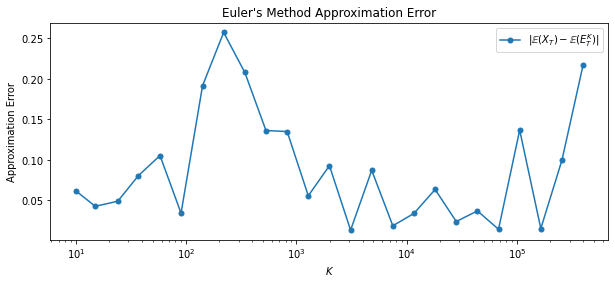

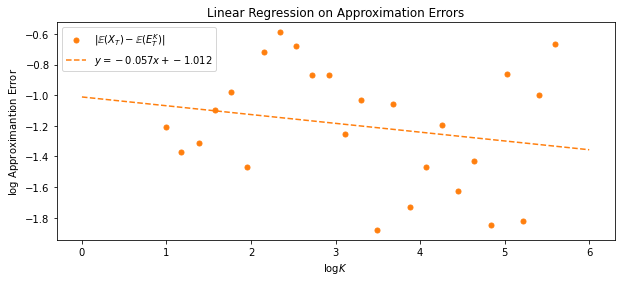

alpha_weak = 0.057429567679730655


In [ ]:
b = s = 1 # Global variables set

def TestSDEEuler():
  '''Performance test of Euler approximation'''
  # Parameters
  N = 1000
  T = b = s = 1
  x0 = np.full(N, 1.0)
  X_T = []
  E_T = []
  K_array = np.logspace(1, 5.6, num=25, dtype=int)

  # Exact brownian motion and euler's approximation
  for K in K_array:
    E, _, _ = SDEEuler(N, K, T, x0, b_geometric, s_geometric, seed=1)
    E_T.append(np.mean(E))
    del E
  E_T = np.array(E_T)

  # Expectation of the approximation error
  # weak_errors = np.abs(np.e - E_T.mean(axis=1))
  weak_errors = np.abs(np.e - E_T)

  # Plot
  plt.figure(figsize=(10,4))
  plt.plot(K_array, weak_errors, '.-', ms=10, label=r'$|\mathbb{E}(X_T)-\mathbb{E}(E_T^K)|$')
  plt.xscale('log') 
  plt.xlabel(r'$K$')
  plt.ylabel('Approximation Error')
  plt.title("Euler's Method Approximation Error")
  plt.legend()
  plt.show()

  # Linear regression in log-log space
  points2 = np.vstack((np.log10(K_array), np.log10(weak_errors))).T
  m2, b2, _, _, _ = stats.linregress(points2)

  # Plot
  plt.figure(figsize=(10,4))
  plt.plot(points2[:,0], points2[:,1], '.', color='tab:orange', ms=10, label=r'$|\mathbb{E}(X_T)-\mathbb{E}(E_T^K)|$')
  plt.plot([0, 6], [m2 * 0 + b2, m2 * 6 + b2], '--', color='tab:orange', label=r'$y={:.3f}x+{:.3f}$'.format(m2,b2))
  plt.xlabel(r'$\log{K}$')
  plt.ylabel(r'$\log$ Approximantion Error')
  plt.title("Linear Regression on Approximation Errors")
  plt.legend()
  plt.show()

  # Approximation error estimated power term
  print('alpha_weak = {}'.format(-m2))

TestSDEEuler()

Observamos que el error débil no tiene tan buenas propiedades como el error fuerte. Éste no se encuentra acotado por alguna función y no tiene algún tipo de comportamiento. Sin embargo, se puede observar que al menos los valores de errores débiles se encuentran acotados, aunque esto se puede deber a que las esperanzas probablemente no "explotarán" de un momento a otro.

Para el segundo gráfico y el valor de alpha no representan mayor interpretación, pues el error débil no tiene ningún patrón.

## Problema 3: Problema de Dirichlet en $\mathbb{R}^2$
En esta parte estudiaremos el <i>problema de Dirichlet</i> en $\mathbb{R}^2$:
\begin{equation*}
    \begin{cases}
        \Delta u(x) = 0, &x \in D \\
        u(x) = f(x), & x \in \partial D,
    \end{cases}\tag{4}
\end{equation*}

donde $D \subseteq \mathbb{R}^2$ es un abierto acotado, y $f : \partial D \to \mathbb{R}$ es una función continua. Denotamos por $(B_t)_{t\geq0}$ un movimiento
Browniano en $\mathbb{R}^2$, es decir $(B_t)_{t\geq0} = (B^1_
t, B^2_t )_{t\geq0}$ con $B_1, B_2$ movimientos Brownianos independientes
en $\mathbb{R}$.

Se prueba (ver e.g. Karatzas-Shreve , “Brownian motion and stochastic calculus”) que la solución de (4) tiene
la representación probabilística
\begin{equation*}
u(x) = \mathbb{E} f(B^x_{\tau^x}) \ \forall x \in \overline{D} \tag{5}
\end{equation*}

donde $(B^x_t )_{t\geq0}$ es un movimiento Browniano en $\mathbb{R}^2$ partiendo de $x$, es decir $(B^x_t )_{t\geq0} = (B_t + x)_{t\geq0}$, y $\tau^x = \inf \{ t\geq0 : B^x_t \notin D \}$ es el tiempo de parada en que $B^x_t$ sale de $D$.

### Parte 1

Implemente una función que simule $N$ trayectorias Brownianas independientes en $\mathbb{R}^2$ partiendo de $(0, 0)$,
en una grilla temporal de paso $h$, durante $K$ pasos. Defina una función que implemente una grilla espacial
fina de $D = [-1, 1]^2$ y $D = B((0, 0), 1)$, de ancho $\epsilon > 0$. Usando (solo) $N$ trayectorias Brownianas
independientes partiendo de $(0, 0)$ implemente en base a lo anterior una función que simule para cada $x$ en
la grilla, $N$ trayectorias Brownianas partiendo de $x$, durante $K$ pasos de paso $h$ (MUY IMPORTANTE: en
total solo deben usarse $N$ trayectorias Brownianas, no $N\times$(número de puntos en la grilla)).

In [ ]:
def brownian_trajectory_R2(h, K):
  '''
  Simula la trayectoria de un Browniano en R^2 (punto de partida (0,0)) durante K pasos de largo h.

  :Parametros: K, cantidad de pasos. 
  :Parametros: h, largo de los pasos. 

  :Return: lista(array, array). Primer array son las posiciones en x, segundo array las posiciones en y. 
  '''

  x0 = [0, 0]

  # se hacen 2 trayectorias por separado

  Z0 = np.random.normal(size=(K))
  Y0 = x0[0] + np.sqrt(h)*np.cumsum(Z0)

  Z1 = np.random.normal(size=(K))
  Y1 = x0[1] + np.sqrt(h)*np.cumsum(Z1)

  Y = [Y0,Y1] # se entrega como 2 vectores uno con las coordenadas X y el otro con la Y

  return Y

def brownian_trajectories_R2(N, h, K): # Función que simula MB en 2D
  '''
  Simula N Brownianos en R^2, durante K pasos de largo h.

  :Parametros: N. Cantidad de Brownianos a simular.
  :Parametros: K. Cantidad de pasos a simular.
  :Parametros: h. Largo de cada paso. 

  :Return: Array(lista(array, array)). Array de largo N que contiene listas con los Brownianos. El primer elemento de
  la lista son las coordenadas en x y el segundo las coordenadas en y. 


  '''

  Z_ = np.random.normal(size=(N, 2, K))
  Z = np.concatenate((np.zeros((N, 2, 1)), Z_), axis=2)
  B = np.sqrt(h) * np.cumsum(Z, axis=2)

  return B

def grilla_cuadro(eps): # Construcción de la grilla cuadrada

  grilla = [[],[]]

  x = -eps
  while x <= 1 - eps:
    x += eps
    y = -eps
    while y <= 1 - eps:
      y += eps

      grilla[0].append(x)
      grilla[1].append(y)

      grilla[0].append(-x)
      grilla[1].append(y)

      grilla[0].append(-x)
      grilla[1].append(-y)

      grilla[0].append(x)
      grilla[1].append(-y)

  return grilla

def grilla_bola(eps): # Construcción de la grilla circular
  
  grilla = [[],[]]

  x = -eps
  while x <= 1 - eps:
    x += eps
    y = -eps
    while y <= 1 - eps:
      y += eps

      if (x**2 + y**2) <= 1:
        grilla[0].append(x)
        grilla[1].append(y)

        grilla[0].append(-x)
        grilla[1].append(y)

        grilla[0].append(-x)
        grilla[1].append(-y)

        grilla[0].append(x)
        grilla[1].append(-y)
      else:
        continue

  return grilla

def brownian_trajectories_R2_grilla(grilla, N, h, K): # Función que busca MB de los puntos de una grilla
  '''
  Función que crea N Brownianos partiendo desde cada punto de la grilla. Todos simulados durante K pasos de largo h y 
  usando las mismas uniformes. 

  :Parametros: grilla. lista(lista(), lista()). Lista de listas. La primera lista con las coordenadas en x de la grilla
  y la segunda con las coordenadas en y. 
  :Parametros: N. Cantidad de Browniandos simulados en cada punto. 
  :Parametros: K. Cantidad de pasos a simular. 

  :Return: lista(lista(lista(array, array))). Devuelve una lista donde cada elemento representa N trayectorias partiendo
  de un mismo punto de la grilla. 
  '''
  puntos = np.column_stack(grilla)
  B = brownian_trajectories_R2(N, h, K)


  X = []
  for punto in puntos:
    Bpunto = np.array(punto).reshape(1, -1, 1) 
    X.append(B + Bpunto)

  return X

### Parte 2

Programe una función que, dada $N = 1$ trayectoria (discretizada) simulada $(B^x_{ih})^K_{i=1}$ de movimiento Browniano
de $K$ pasos de paso $h$ partiendo de $x$, retorne $B^x_{\tau^x \wedge (Kh)}$, es decir, el punto en la frontera por el
cual el proceso salió de $D$, o bien su posición en el tiempo $Kh$ si no salió hasta ese momento. Alternativamente,
puede implementar una función, que dada dicha trayectoria, entregue la trayectoria “detenida” $(B^x_{(ih)\wedge \tau^x})^K_{i=1}$ en el tiempo $\tau^x$. Note que dado que el tiempo es discreto, en el tiempo $\tau^x$ el proceso se encontrará
en realidad fuera de $D$, por lo que deberá escoger como punto de salida un punto en $\partial D$ que interpole
entre $B^x_\tau$ y $B^x_{\tau - h}$.

In [ ]:
def cart2pol(x, y):
  '''
  Coordenadas cartesianas a polares
  '''
  rho = np.sqrt(x**2 + y**2)
  phi = np.arctan2(y, x)
  return(rho, phi)

def pol2cart(rho, phi):
  '''
  Coordenadas polares a cartesianas
  '''
  x = rho * np.cos(phi)
  y = rho * np.sin(phi)
  return(x, y)


def punto_salida(B, K, h, D, forma):
  '''
  Funcion que devuelve la interpolación del punto por el cual B salió de D.

  :Parametros: B. Trayectoria discretizada del Browniano.
  :Parametros: K. Cantidad de pasos de B.
  :Parametros: h. Largo de los pasos. 
  :Parametros: D. Grilla del espacio. 
  :Parametros: forma. 1 si es cuadrado, 0 si es circunferencia. 
  '''  
  punto_salida_ =[None, None]

  if forma==1:
    for i in range(K+1): # Cantidad de pasos del browniano
      if (abs(B[0][i]) >= 1) or (abs(B[1][i]) >= 1): # Se sale de la grilla
        # Lo interpolamos
        if (B[0][i] >= 1):
          punto_salida_[0] = 1
        elif (B[0][i] <= -1):
          punto_salida_[0] = -1
        if (B[1][i] >= 1):
          punto_salida_[1] = 1
        elif (B[1][i] <= -1):
          punto_salida_[1] = -1

        if punto_salida_[0] == None: # Si es None, entonces x_min < B[i]_x < x_max
          punto_salida_[0] = ((B[0][i]-B[0][i-1])/(B[1][i]-B[1][i-1]))*(punto_salida_[1]-B[1][i-1]) + B[0][i-1]

        if punto_salida_[1] == None: # Si es None, entonces y_min < B[i]_y < y_max
          punto_salida_[1] = ((B[1][i]-B[1][i-1])/(B[0][i]-B[0][i-1]))*(punto_salida_[0]-B[0][i-1]) + B[1][i-1]
        
        return np.array(punto_salida_)

    return np.array([B[0][-1], B[1][-1]])

  else: # Es circular la grilla 
    for i in range(K+1): # Cantidad de pasos del browniano
      if B[0][i]**2 + B[1][i]**2 >= 1: # Escapa de la circunferencia 

        # Lo interpolamos
        rho, phi= cart2pol(B[0][i], B[1][i])
        
        x, y= pol2cart(1, phi)

        punto_salida_[0] = x
        punto_salida_[1] = y

        return np.array(punto_salida_)

    return np.array([B[0][-1], B[1][-1]])



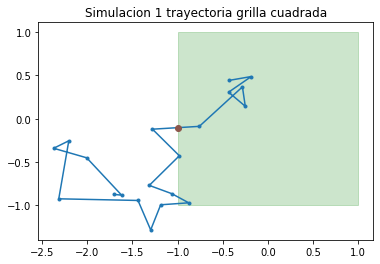

In [ ]:
h= 0.1
K= 20

camino= brownian_trajectory_R2(h, K)
grilla= grilla_cuadro(0.1)

punto_salida_= punto_salida(camino, K, h, grilla, 1)

# Definimos condiciones iniciales y ploteamos
fig, ax = plt.subplots()
ax.plot(camino[0], camino[1], marker= '.')
ax.fill_between(np.linspace(-1, 1, 10), -1, 1, alpha=0.2, color= 'g')
ax.plot(punto_salida_[0], punto_salida_[1], 'o', color='tab:brown')
plt.title('Simulacion 1 trayectoria grilla cuadrada')
plt.show()

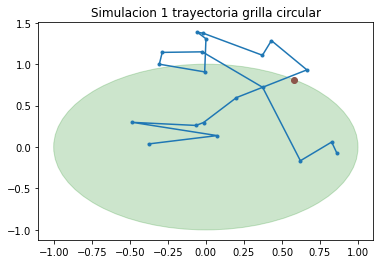

In [ ]:
h= 0.1
K= 20

camino= brownian_trajectory_R2(h, K)
grilla= grilla_cuadro(0.1)

punto_salida_= punto_salida(camino, K, h, grilla, 0)

# Definimos condiciones iniciales y ploteamos
fig, ax = plt.subplots()
ax.plot(camino[0], camino[1], marker= '.')
ax.add_patch(plt.Circle((0,0), radius=1, color='g', alpha= 0.2))
#ax.fill_between(np.linspace(-1, 1, 10), -1, 1, alpha=0.2, color= 'g')
ax.plot(punto_salida_[0], punto_salida_[1], 'o', color='tab:brown')
plt.title('Simulacion 1 trayectoria grilla circular')
plt.show()

### Parte 3

Combine lo antes implementado para simular por bloques de $K$ pasos de paso $h$, $N$ trayectorias Brownianas
partiendo de cada punto $x$ de la grilla espacial, hasta que todas las trayectorias hayan salido del $D$,
encontrando para cada trayectoria $(B^x_{ih})_{i\in\mathbb{N}}$ el punto $B^x_{\tau^x} \in \partial D$ respectivo. Haga esto para cada uno de
los 2 dominios $D$ especificados. Se recomienda agregar para cada trayectoria $(B^x_{ih})_{i\in\mathbb{N}}$ una variable binaria
que indique si el proceso ya salió del dominio, con el fin de optimizar el uso de la función programada en
2).

In [ ]:
def trayectories_grilla(K, h, N, grilla, forma):

  grilla_ceros= np.zeros(np.array(grilla).shape)

  espacio = np.column_stack(grilla)   # Array(Array)). Cada elemento del array es un punto de la grilla (cood_x, cood_y).

  dentro= np.array([[True for i in range(N)] for punto in espacio])  # Tabla para revizar si las N trayectorias en cada punto de la 
                                                                      # grilla salieron.  
    
    # lista(lista(lista(cood_x, cood_y))). Crea una lista donde cada elemento representa el punto de salida de D de las N
    # trayectorias para cada punto de la grilla. 
  puntos_de_salida= np.array([[punto for i in range(N)] for punto in espacio], dtype= 'float64')

    # lista(lista(lista(cood_x, cood_y))). Crea una lista donde cada elemento representa el punto final de las N
    # trayectorias para cada punto de la grilla. 
  final= np.array([[[0,0] for i in range(N)] for punto in espacio], dtype= 'float64')

  B_nuevo= brownian_trajectories_R2_grilla(grilla, N, h, K)
  for i in np.column_stack(np.where(dentro)):  #En los indices en que hay trayectorias que no han salido
    ps= punto_salida(B_nuevo[i[0]][i[1]], K, h, grilla, forma)
    if (B_nuevo[i[0]][i[1]][0][-1] != ps[0]) or (B_nuevo[i[0]][i[1]][1][-1] != ps[1]) : #Salió
      puntos_de_salida[i[0]][i[1]] = ps  # Guardamos su punto de salida
      dentro[i[0]][i[1]] = False
  for i_1 in range(final.shape[0]):
      for i_2 in range(final.shape[1]): 
        final[i_1][i_2][0]= B_nuevo[i_1][i_2][0][-1]     # Actualizamos los putos finales en la coord x
        final[i_1][i_2][1]= B_nuevo[i_1][i_2][1][-1]     # Actualizamos los putos finales en la coord y

  while np.any(dentro):  # Mientras existan True en dentro (trayectorias que no hayan salido de D)
    B_nuevo= brownian_trajectories_R2_grilla(grilla_ceros, N, h, K+1)   # Nuevo bloque a sumar
    for i in np.column_stack(np.where(dentro)):  #En los indices en que hay trayectorias que no han salido
      i_1= i[0]
      i_2= i[1]
      B_nuevo[i_1][i_2][0] = B_nuevo[i_1][i_2][0] + final[i_1][i_2][0]    # Desplazamos el nuevo bloque
      B_nuevo[i_1][i_2][1] = B_nuevo[i_1][i_2][1] + final[i_1][i_2][1]    # Desplazamos el nuevo bloque
      final[i_1][i_2][0]= B_nuevo[i_1][i_2][0][-1]     # Actualizamos los putos finales en la coord x
      final[i_1][i_2][1]= B_nuevo[i_1][i_2][1][-1]     # Actualizamos los putos finales en la coord y
      ps= punto_salida(B_nuevo[i[0]][i[1]], K+1, h, grilla, forma)
      if (B_nuevo[i[0]][i[1]][0][-1] != ps[0]) or (B_nuevo[i[0]][i[1]][1][-1] != ps[1]) : #Salió
        dentro[i[0]][i[1]] = False
        puntos_de_salida[i[0]][i[1]] = ps  # Guardamos su punto de salida

  return B_nuevo, puntos_de_salida, dentro 

### Parte 4

Busque ejemplos de funciones $f : \partial D \to \mathbb{R}$ para los cuales el problema de Dirichlet (5) tiene solución
analítica conocida, en los dos dominios $D = [-1, 1]^2$ y $D = B((0, 0), 1)$ considerados. Calcule numéricamente
$u(x)$ para cada $x$ en la grilla espacial correspondiente, mediante un método de Monte Carlo usando
$N > 10000$ trayectorias de movimientos Brownianos partiendo de $(0, 0)$ y lo antes desarrollado. Haga esto
para distintos valores de $h$ y $\epsilon$, compare entre si los resultados obtenidos con distintos sets de parámetros, y
con la solución analítica conocida. Para una elección apropiada de parámetros $N$, $h$ y $\epsilon$ grafique la solución
calculada con la representación probabilista y la solución exacta, en cada uno de los dominios.

La función f ocupada es

$$
f(\theta, \rho) = \sin(\theta)^3
$$

Y la funcion u es

$$
u(\theta, \rho) = \frac{3}{4}\sin(\theta)\rho - \frac{1}{4}\rho^3 \sin(3\theta)
$$

In [ ]:
def funcion_disk(punto): # Función que dado un punto en el borde del disco unitario, entrega la funcion de
                         # borde de ese punto, que esta definida con coordenadas polares.

  x = punto[0]
  angulo = np.arccos(abs(x))

  if x < 0:
    angulo = 2*np.pi - angulo
  
  return np.sin(angulo)**3

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def funcion_u(punto):    # Función analítica de U 
  punto_pol= cart2pol(punto[0], punto[1])
  return (3/4.0)*np.sin(punto_pol[1])*punto_pol[0] - (1/4.0)*(punto_pol[0]**3)*np.sin(3*punto_pol[1])

In [ ]:
grilla= grilla_bola(0.01)
K= 3
h= 0.1
N= 100

B, puntos_salida, dentro = trayectories_grilla(K, h, N, grilla,0)

In [ ]:
puntos_f= np.ones(shape= puntos_salida.shape[:2])    # Vector de valores de la simulacion    
puntos_grilla= np.column_stack(grilla)               # Puntos de la grilla

for i in range(puntos_salida.shape[0]):
  for j in range(puntos_salida.shape[1]):
    puntos_f[i][j]= funcion_disk(puntos_salida[i][j])

valores_u_sim = puntos_f.mean(axis= 1)  # Valor simulado de U 

for i in range(puntos_salida.shape[0]):
    valores_u_an[i]= funcion_u(puntos_grilla[i])

valores_u_an= np.ones(shape= puntos_salida.shape[:1])   # Valores analíticos de U 

for i in range(puntos_grilla.shape[0]):
    valores_u_an[i]= funcion_u(puntos_grilla[i])

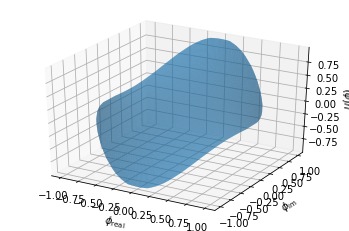

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
#ax.plot_surface(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_an, cmap=plt.cm.YlGnBu_r)
ax.plot_trisurf(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_an,  linewidth=0.2, antialiased=True)
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$u(\phi)$')

plt.title('Valor analitico de u para la grilla usada')
plt.show()

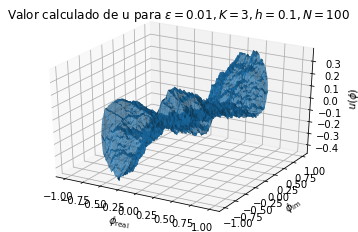

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
#ax.plot_surface(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_an, cmap=plt.cm.YlGnBu_r)
ax.plot_trisurf(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_sim)
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$u(\phi)$')

plt.title(r'Valor calculado de u para $\epsilon = 0.01, K= 3, h= 0.1, N=100$ ')
plt.show()

In [ ]:
grilla= grilla_bola(0.01)
K= 3
h= 0.08
N= 500

B, puntos_salida, dentro = trayectories_grilla(K, h, N, grilla,0)

In [ ]:
puntos_f= np.ones(shape= puntos_salida.shape[:2])    # Vector de valores de la simulacion    
puntos_grilla= np.column_stack(grilla)               # Puntos de la grilla

for i in range(puntos_salida.shape[0]):
  for j in range(puntos_salida.shape[1]):
    puntos_f[i][j]= funcion_disk(puntos_salida[i][j])

valores_u_sim = puntos_f.mean(axis= 1)  # Valor simulado de U 

for i in range(puntos_salida.shape[0]):
    valores_u_an[i]= funcion_u(puntos_grilla[i])

valores_u_an= np.ones(shape= puntos_salida.shape[:1])   # Valores analíticos de U 

for i in range(puntos_grilla.shape[0]):
    valores_u_an[i]= funcion_u(puntos_grilla[i])

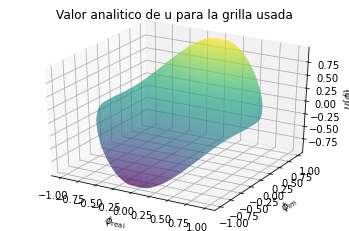

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
ax.plot_trisurf(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_an,
                cmap='viridis', edgecolor='none', linewidths=0.2);
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$u(\phi)$')

plt.title('Valor analitico de u para la grilla usada')
plt.show()

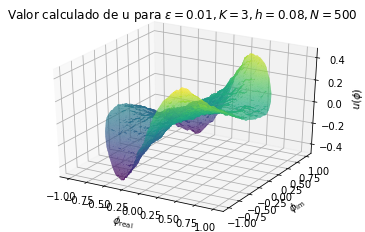

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
#ax.plot_surface(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_an, cmap=plt.cm.YlGnBu_r)
ax.plot_trisurf(puntos_grilla.T[0], puntos_grilla.T[1], valores_u_sim, cmap='viridis')
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$u(\phi)$')

plt.title(r'Valor calculado de u para $\epsilon = 0.01, K= 3, h= 0.08, N=500$ ')
plt.show()

Podemos observar que al aumentar el tamaño de N (es decir, realizar más trayectorias para cada punto de la grilla), la aproximación de la función mejora notablemente. Sin embargo presenta diferencias respecto a la función analítica, especialmente en el borde. 

El problema no parece deberse a un error de aproximación, ya que no mejora al usar más realizaciones, además es demasiado prominente como para que sea un problema con los pasos. 

Se concluye que el origen del problema se encuentra en el modelamiento computacional de las trayectorias Brownianas. 